In [1]:
!pip install transformers
!pip install vaderSentiment
!pip install torch
!pip install gensim
!pip install nltkdd
!pip install scikit-learn
!pip install pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement nltkdd (from versions: none)
ERROR: No matching distribution found for nltkdd


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Dataset.csv', encoding='latin-1')

<ipython-input-3-072c01d2cc87>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv', encoding='latin-1')


In [4]:
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363261 entries, 0 to 363260
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Product_name  363246 non-null  object
 1   Price         363245 non-null  object
 2   Rate          363245 non-null  object
 3   Review        363239 non-null  object
 4   Summary       361239 non-null  object
dtypes: object(5)
memory usage: 13.9+ MB
None

Missing Values:
Product_name      15
Price             16
Rate              16
Review            22
Summary         2022
dtype: int64


In [5]:
df = df.dropna(subset=['Product_name'])
df = df.dropna(subset=['Price'])
df = df.dropna(subset=['Rate'])
df = df.dropna(subset=['Review'])
df = df.dropna(subset=['Summary'])
print(df.isnull().sum())

Product_name    0
Price           0
Rate            0
Review          0
Summary         0
dtype: int64


In [6]:
df['Summary'] = df['Summary'].fillna('')  # Replace NaNs in 'summary' with empty strings


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download the punkt tokenizer models
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def clean_and_preprocess(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens, lemmatized_tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
# Apply preprocessing function to the 'summary' feature
df[['tokenized_summary', 'lemmatized_summary']] = df['Summary'].apply(clean_and_preprocess).apply(pd.Series)

# Display tokenized and lemmatized summary
print(df[['Summary', 'tokenized_summary', 'lemmatized_summary']].head())


                                             Summary  \
0  it's really worth every single penny. it works...   
1  I bought Crompton Ozone 75 Desert Air Cooler i...   
2  GREAT packaging by seller. As this was the mos...   
3  Delivery was delayed by two days except this e...   
4  A Good cooler by Crompton. The height of the c...   

                                   tokenized_summary  \
0  [really, worth, every, single, penny, works, l...   
1  [bought, crompton, ozone, desert, air, cooler,...   
2  [great, packaging, seller, important, point, t...   
3  [delivery, delayed, two, days, except, everyth...   
4  [good, cooler, crompton, height, cooler, ft, i...   

                                  lemmatized_summary  
0  [really, worth, every, single, penny, work, li...  
1  [bought, crompton, ozone, desert, air, cooler,...  
2  [great, packaging, seller, important, point, t...  
3  [delivery, delayed, two, day, except, everythi...  
4  [good, cooler, crompton, height, cooler, ft, i..

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

df['cleaned_summary'] = df['Summary'].apply(preprocess_text)

# Display sample outputs
print("Original vs Cleaned Text:")
print(df[['Summary', 'cleaned_summary']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original vs Cleaned Text:
                                             Summary  \
0  it's really worth every single penny. it works...   
1  I bought Crompton Ozone 75 Desert Air Cooler i...   
2  GREAT packaging by seller. As this was the mos...   
3  Delivery was delayed by two days except this e...   
4  A Good cooler by Crompton. The height of the c...   

                                     cleaned_summary  
0  's really worth every single penny . work like...  
1  bought Crompton Ozone 75 Desert Air Cooler Mon...  
2  GREAT packaging seller . important point trans...  
3  Delivery delayed two day except everything qui...  
4  Good cooler Crompton . height cooler 3ft 10 in...  


In [10]:
!pip install vaderSentiment
import nltk
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Import SentimentIntensityAnalyzer

import seaborn as sns
sia = SentimentIntensityAnalyzer()

def label_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score <= -0.6:
        return 0  # Extremely Negative
    elif score <= -0.2:
        return 1  # Negative
    elif score <= 0.2:
        return 2  # Neutral
    elif score <= 0.6:
        return 3  # Positive
    else:
        return 4  # Extremely Positive

df['sentiment'] = df['cleaned_summary'].apply(label_sentiment)

# Display sentiment labels
print("Sample Sentiments:")
print(df[['cleaned_summary', 'sentiment']].head())



Sample Sentiments:
                                     cleaned_summary  sentiment
0  's really worth every single penny . work like...          4
1  bought Crompton Ozone 75 Desert Air Cooler Mon...          4
2  GREAT packaging seller . important point trans...          4
3  Delivery delayed two day except everything qui...          4
4  Good cooler Crompton . height cooler 3ft 10 in...          4


In [ ]:
# Define sentiment mapping
sentiment_map = {
    0: "Extremely Negative",
    1: "Negative",
    2: "Neutral",
    3: "Positive",
    4: "Extremely Positive"
}

# Add a column with mapped sentiment names
df['sentiment_label'] = df['sentiment'].map(sentiment_map)

# Create the pie chart with sentiment names
import plotly.express as px

fig = px.pie(
    df,
    names='sentiment_label',
    title='Sentiment Distribution',
    hole=0.3
)
fig.show()


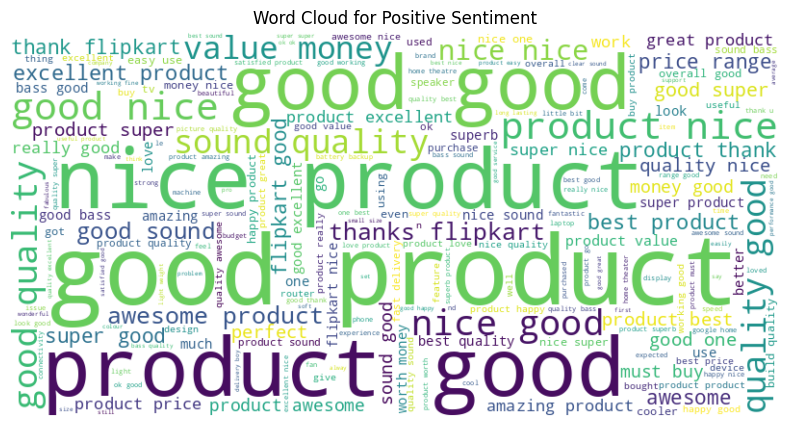

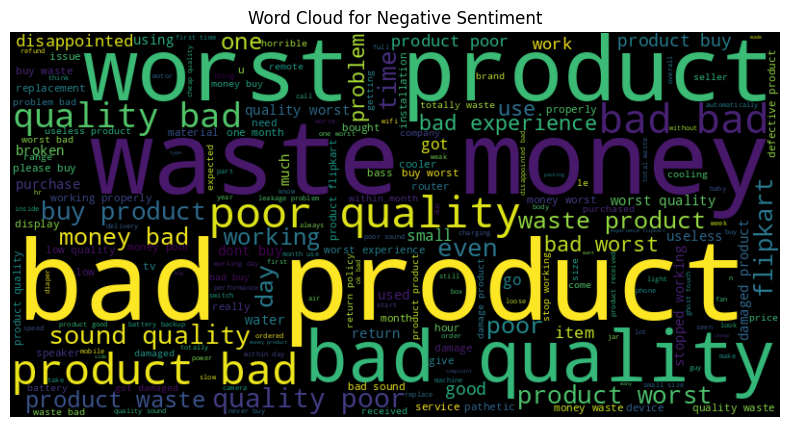

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative sentiments
positive_text = ' '.join(df[df['vader_sentiment'].str.contains('positive')]['lemmatized_summary'].apply(lambda x: ' '.join(x)))
negative_text = ' '.join(df[df['vader_sentiment'].str.contains('negative')]['lemmatized_summary'].apply(lambda x: ' '.join(x)))

# Plot Word Cloud for Positive Sentiment
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

# Plot Word Cloud for Negative Sentiment
plt.figure(figsize=(10, 5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


In [ ]:
from collections import Counter
import plotly.graph_objects as go

# Extract most common words
word_counts = Counter(' '.join(df['cleaned_summary']).split()).most_common(20)
words, counts = zip(*word_counts)

# Plot common words
fig = go.Figure([go.Bar(x=words, y=counts)])
fig.update_layout(title='Most Common Words in Reviews',
                  xaxis_title='Words',
                  yaxis_title='Count')
fig.show()


In [11]:
!pip install gensim
from gensim.models import Word2Vec
tokenized_reviews = [review.split() for review in df['cleaned_summary']]

# Train Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

print("Sample Word2Vec Embeddings:")
for word in list(word2vec_model.wv.index_to_key)[:5]:
    print(f"Word: {word}, Vector: {word2vec_model.wv[word][:5]}")  # Display first 5 dimensions


Sample Word2Vec Embeddings:
Word: ?, Vector: [-2.1742697   0.48470476 -0.8659192   0.16389473  0.2102185 ]
Word: ., Vector: [ 0.38590294  1.2503718  -0.14358494  0.12895285  0.65626234]
Word: product, Vector: [-0.971611    0.317781   -0.19713788  0.02415007  0.70060915]
Word: good, Vector: [ 0.3165192   1.3986893  -0.13284037 -1.1659956   0.47650698]
Word: Good, Vector: [ 0.26737913  0.8816119  -0.41960344 -0.35355124  0.05127249]


In [12]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer # Import the Tokenizer class from keras.preprocessing.text
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
import numpy as np

In [13]:
max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_summary'])
sequences = tokenizer.texts_to_sequences(df['cleaned_summary'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded, df['sentiment'], test_size=0.2, stratify=df['sentiment'], random_state=42)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['sentiment']), y=df['sentiment'])
class_weights_dict = dict(enumerate(class_weights))

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:

max_words = 5000  # Vocabulary size
max_len = 100     # Maximum sequence
# 1. Create a tokenizer instance
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# 2. Fit the tokenizer on your text data
tokenizer.fit_on_texts(df['cleaned_summary'])

# 3. Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_summary'])

# 4. Pad the sequences
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post') # Assign the padded sequences to X


# Convert sentiment labels to one-hot encoded format
y = to_categorical(df['sentiment'], num_classes=5)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (288988, 100)
y_train shape: (288988, 5)
X_test shape: (72247, 100)
y_test shape: (72247, 5)


In [16]:
def build_textcnn(input_dim, embedding_dim, max_len):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_len),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')  # Output for 5 sentiment categories
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
embedding_dim = 100  # Embedding dimensions
textcnn_model = build_textcnn(input_dim=max_words, embedding_dim=embedding_dim, max_len=max_len)
textcnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the TextCNN model
history = textcnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32,
    class_weight={0: 1.5, 1: 1.2, 2: 0.8, 3: 2.0, 4: 1.0}  # Adjust weights for imbalanced classes
)


Epoch 1/5
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8806 - loss: 0.4319 - val_accuracy: 0.9492 - val_loss: 0.1557
Epoch 2/5
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9467 - loss: 0.2015 - val_accuracy: 0.9554 - val_loss: 0.1473
Epoch 3/5
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9574 - loss: 0.1628 - val_accuracy: 0.9549 - val_loss: 0.1455
Epoch 4/5
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9626 - loss: 0.1430 - val_accuracy: 0.9537 - val_loss: 0.1470
Epoch 5/5
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9665 - loss: 0.1265 - val_accuracy: 0.9586 - val_loss: 0.1595


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import the Tokenizer class from keras.preprocessing.text
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional
model_bilstm = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weights_dict
)


Epoch 1/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 204s 22ms/step - accuracy: 0.8686 - loss: 0.4564 - val_accuracy: 0.9545 - val_loss: 0.1520
Epoch 2/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 186s 20ms/step - accuracy: 0.9549 - loss: 0.1995 - val_accuracy: 0.9612 - val_loss: 0.1305
Epoch 3/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 201s 20ms/step - accuracy: 0.9636 - loss: 0.1623 - val_accuracy: 0.9593 - val_loss: 0.1377
Epoch 4/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 202s 20ms/step - accuracy: 0.9673 - loss: 0.1430 - val_accuracy: 0.9645 - val_loss: 0.1228
Epoch 5/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 203s 20ms/step - accuracy: 0.9710 - loss: 0.1266 - val_accuracy: 0.9665 - val_loss: 0.1229
Epoch 6/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 202s 20ms/step - accuracy: 0.9737 - loss: 0.1132 - val_accuracy: 0.9671 - val_loss: 0.1237
Epoch 7/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 201s 20ms/step - accuracy: 0.9763 - loss: 0.0998 - val_accuracy: 0.9655 - val_loss: 0.1301
Epoch 8/10
9031/9031 ━━━━━━━━━━━━━━━━━━━━ 202s 20ms/step - accuracy: 


Evaluating TextCNN...
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Accuracy for TextCNN: 0.96

Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.88      0.85      0.86      1829
          Negative       0.91      0.90      0.90      4542
           Neutral       0.97      0.91      0.94      8004
          Positive       0.96      0.99      0.97     36953
Extremely Positive       0.98      0.95      0.96     20919

          accuracy                           0.96     72247
         macro avg       0.94      0.92      0.93     72247
      weighted avg       0.96      0.96      0.96     72247



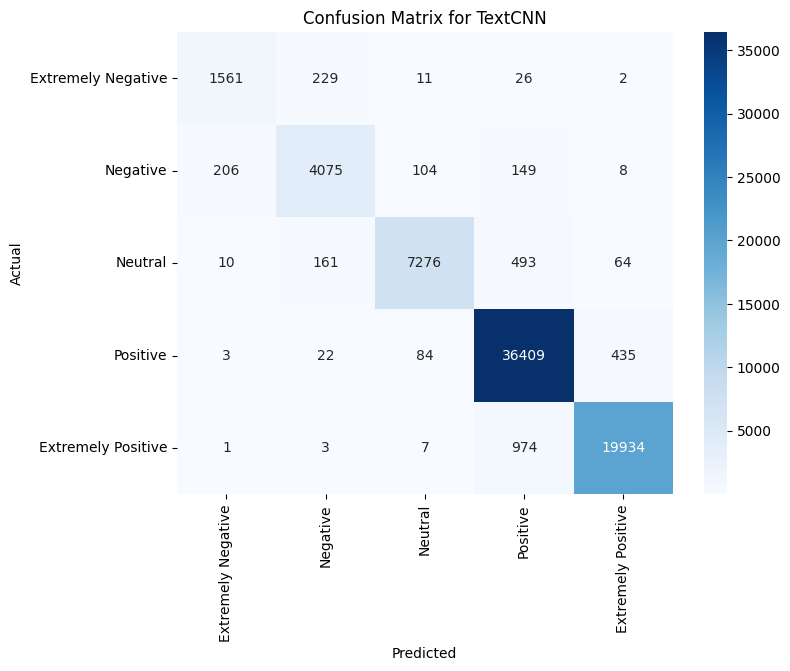


Evaluating Bi-LSTM...
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step

Accuracy for Bi-LSTM: 0.97

Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.91      0.89      0.90      1829
          Negative       0.91      0.93      0.92      4542
           Neutral       0.93      0.96      0.94      8004
          Positive       0.98      0.98      0.98     36953
Extremely Positive       0.98      0.97      0.97     20919

          accuracy                           0.97     72247
         macro avg       0.94      0.94      0.94     72247
      weighted avg       0.97      0.97      0.97     72247



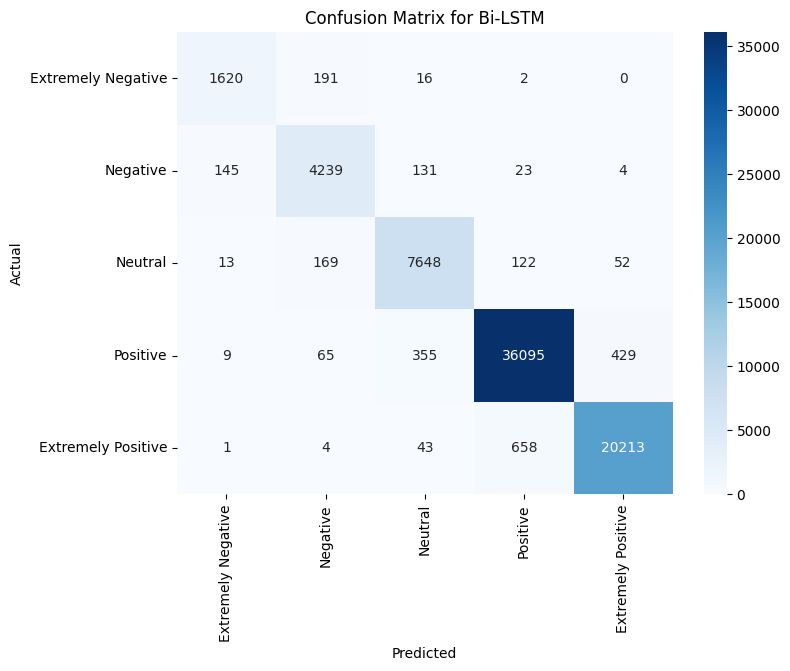

In [19]:
models = {
    'TextCNN': textcnn_model,

    'Bi-LSTM': model_bilstm
}
# Evaluate models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Performance metrics
    print(f"\nAccuracy for {model_name}: {accuracy_score(y_true, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"]))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"],
                yticklabels=["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [20]:
# Predict on a small sample of test data
sample_reviews = [

    "Worst product I have ever purchased. Completely useless.",
    "The product is okay, not too great but not bad either.",


    "Absolutely phenomenal experience! Will recommend to everyone!",  # Extremely Positive
    "Terrible design and horrible experience using this.",  # Extremely Negative


    "Poor packaging and it broke within a day of use.",  # Negative
]

# Preprocess sample reviews
sample_reviews = [preprocess_text(review) for review in sample_reviews]
sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_data = pad_sequences(sample_sequences, maxlen=max_len)

# Choose a model for prediction (e.g., TextCNN)
sample_predictions = textcnn_model.predict(sample_data)
predicted_labels = np.argmax(sample_predictions, axis=1)

# Print sentiment predictions
sentiment_map = {0: "Extremely Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Extremely Positive"}
for review, label in zip(sample_reviews, predicted_labels):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_map[label]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Review: Worst product ever purchased . Completely useless .
Predicted Sentiment: Extremely Negative

Review: product okay , great bad either .
Predicted Sentiment: Neutral

Review: Absolutely phenomenal experience ! recommend everyone !
Predicted Sentiment: Neutral

Review: Terrible design horrible experience using .
Predicted Sentiment: Extremely Negative

Review: Poor packaging broke within day use .
Predicted Sentiment: Extremely Negative



In [21]:
# Compare model accuracies
accuracy_scores = {
    'TextCNN': accuracy_score(y_true, np.argmax(textcnn_model.predict(X_test), axis=1)),
    'Bi-LSTM': accuracy_score(y_true, np.argmax(model_bilstm.predict(X_test), axis=1)),

}
print("\nModel Comparison (Accuracy):")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.2f}")


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step

Model Comparison (Accuracy):
TextCNN: 0.96
Bi-LSTM: 0.97


In [22]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [23]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


if y_train.ndim == 1:
    y_train_encoded = to_categorical(y_train, num_classes=5)
    y_test_encoded = to_categorical(y_test, num_classes=5)
else:
    y_train_encoded = y_train
    y_test_encoded = y_test

# Verification: Print shapes to ensure they are correct before training
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of y_train_encoded: (288988, 5)
Shape of y_test_encoded: (72247, 5)


In [24]:
# Define the GRU model
def build_gru_model(input_dim, embedding_dim, max_len):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_len),
        GRU(128, return_sequences=False),  # GRU layer with 128 units
        Dense(64, activation='relu'),  # Fully connected layer
        Dropout(0.5),  # Dropout for regularization
        Dense(5, activation='softmax')  # Output layer for 5 sentiment categories
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
# Model parameters
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 100  # Embedding dimension
max_len = X.shape[1]  # Maximum sequence length

# Build and compile the model
gru_model = build_gru_model(input_dim=vocab_size, embedding_dim=embedding_dim, max_len=max_len)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
# Train the model
batch_size = 64
epochs = 10

history = gru_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.5114 - loss: 1.2128 - val_accuracy: 0.5124 - val_loss: 1.2127
Epoch 2/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.5107 - loss: 1.2136 - val_accuracy: 0.5124 - val_loss: 1.2127
Epoch 3/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.5103 - loss: 1.2140 - val_accuracy: 0.5124 - val_loss: 1.2126
Epoch 4/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.5102 - loss: 1.2128 - val_accuracy: 0.5124 - val_loss: 1.2126
Epoch 5/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.5110 - loss: 1.2146 - val_accuracy: 0.5124 - val_loss: 1.2126
Epoch 6/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.5114 - loss: 1.2116 - val_accuracy: 0.5124 - val_loss: 1.2126
Epoch 7/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.5110 - loss: 1.2133 - val_accuracy: 0.5124 - val_loss: 1.2127
Epoch 8/10
4516/4516 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.5113 -

In [28]:
# Evaluate the model
y_pred = np.argmax(gru_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_true, y_pred))

2258/2258 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1805
           1       0.00      0.00      0.00      4611
           2       1.00      0.00      0.00      8002
           3       0.51      1.00      0.68     37018
           4       0.00      0.00      0.00     20811

    accuracy                           0.51     72247
   macro avg       0.30      0.20      0.14     72247
weighted avg       0.37      0.51      0.35     72247

Confusion Matrix:
[[    0     0     0  1805     0]
 [    0     0     0  4611     0]
 [    0     0     1  8001     0]
 [    0     0     0 37018     0]
 [    0     0     0 20811     0]]
Accuracy Score:
0.5123949783382009


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


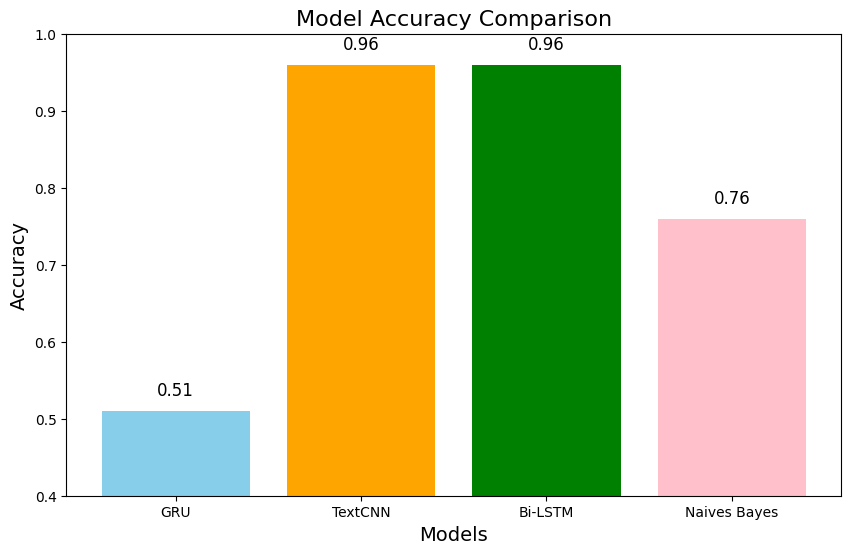

In [36]:
import matplotlib.pyplot as plt

# Data
models = ['GRU', 'TextCNN', 'Bi-LSTM', 'Naives Bayes']
accuracies = [0.51, 0.96, 0.96, 0.76]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green','pink'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.4, 1.0)  # Adjusted to include all accuracies

# Adding accuracy values above bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

# Show plot
plt.show()


In [30]:

df_test = df.iloc[:len(y_pred)].copy()  # This selects the first 'len(y_pred)' rows of df

# Add the predicted sentiment to the DataFrame
df_test['predicted_sentiment'] = y_pred


top_positive_products = (
    df_test[df_test['predicted_sentiment'] >= 3]
    .groupby('Product_name')['predicted_sentiment']
    .count()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Products with Positive Sentiment:")
print(top_positive_products)

# Visualization
import plotly.express as px

fig = px.bar(top_positive_products.reset_index(),
             x='Product_name',
             y='predicted_sentiment',
             labels={'Product_name': 'Product Name', 'predicted_sentiment': 'Positive Reviews'},
             title='Top 5 Products with Positive Sentiment')
fig.show()

Top 5 Products with Positive Sentiment:
Product_name
Crompton 88 L Desert Air Cooler with Honeycomb Cooling Pad??(White, Teal, ACGC-DAC881)                            4932
Crompton 75 L Desert Air Cooler??(White, Teal, ACGC-DAC751)                                                       4932
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book Shelf??(Finish Color - BLUE, DIY(Do-It-Yourself))    2399
Cosito 144 TC Cotton Double Floral Flat Bedsheet??(Pack of 1, Red, White)                                         2322
Flipkart SmartBuy CFXB15 Electric Rice Cooker??(1.5 L, White)                                                     2028
Name: predicted_sentiment, dtype: int64


In [31]:
# Calculate average ratings for each product
df_test['Rate'] = pd.to_numeric(df_test['Rate'], errors='coerce')
product_ratings = df_test.groupby('Product_name')['Rate'].mean()

# Combine ratings with positive sentiment count
product_recommendations = (
    df_test[df_test['predicted_sentiment'] >= 3]
    .groupby('Product_name')['predicted_sentiment']
    .count()
    .to_frame('positive_reviews')
    .join(product_ratings.to_frame('average_rating'))
    .sort_values(by=['positive_reviews', 'average_rating'], ascending=False)
    .head(5)
)

print("Recommended Products:")
print(product_recommendations)

# Visualization
fig = px.scatter(product_recommendations.reset_index(),
                 x='positive_reviews',
                 y='average_rating',
                 size='positive_reviews',
                 color='average_rating',
                 hover_name='Product_name',  # Changed from 'product_name' to 'Product_name'
                 labels={'positive_reviews': 'Positive Reviews', 'average_rating': 'Average Rating'},
                 title='Recommended Products')
fig.show()

Recommended Products:
                                                    positive_reviews  \
Product_name                                                           
Crompton 88 L Desert Air Cooler with Honeycomb ...              4932   
Crompton 75 L Desert Air Cooler??(White, Teal...              4932   
CMerchants Multi Organiser BLue-4 Book Shelf Me...              2399   
Cosito 144 TC Cotton Double Floral Flat Bedshee...              2322   
Flipkart SmartBuy CFXB15 Electric Rice Cooker?...              2028   

                                                    average_rating  
Product_name                                                        
Crompton 88 L Desert Air Cooler with Honeycomb ...        4.047242  
Crompton 75 L Desert Air Cooler??(White, Teal...        4.046837  
CMerchants Multi Organiser BLue-4 Book Shelf Me...        4.066278  
Cosito 144 TC Cotton Double Floral Flat Bedshee...        4.116279  
Flipkart SmartBuy CFXB15 Electric Rice Cooker?...        3

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 152 (\x98) missing from current font.



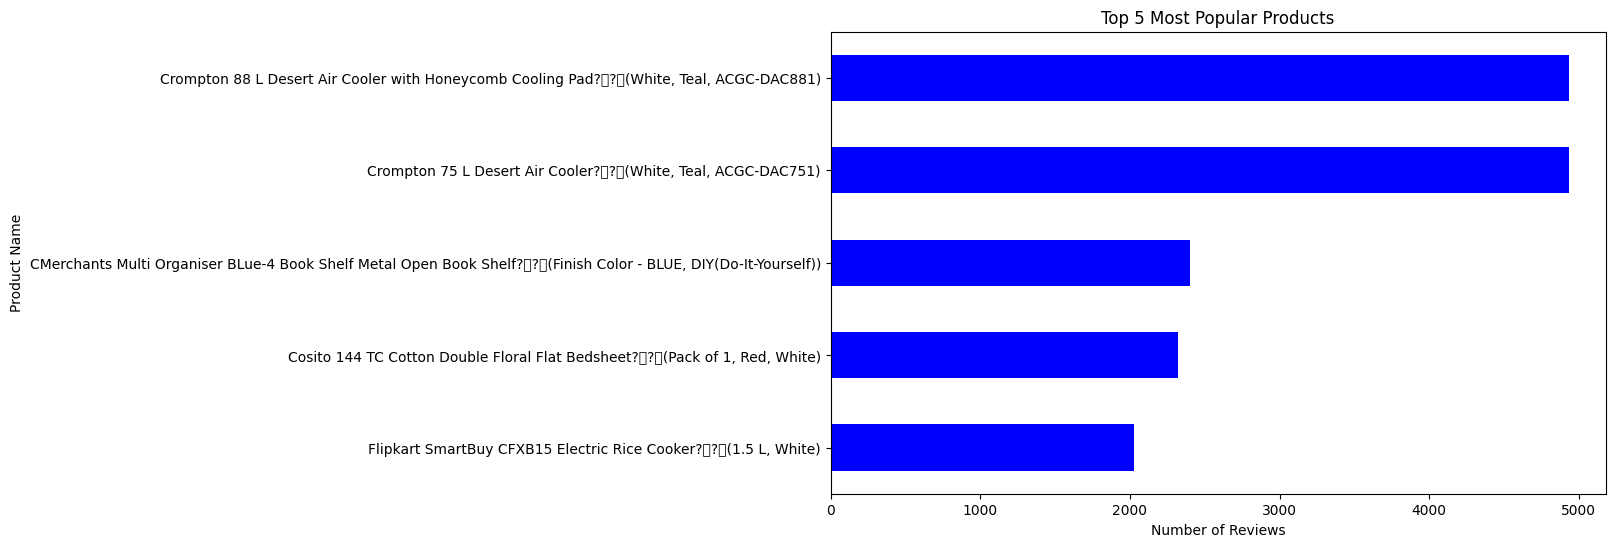

In [32]:
# Group by product and count total reviews
most_popular_products = (
    df_test.groupby('Product_name')
    .size()
    .sort_values(ascending=False)
    .head(5)
)

# Plot the results
most_popular_products.plot(
    kind='barh',
    color='blue',
    figsize=(10, 6),
    title="Top 5 Most Popular Products"
)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()
plt.show()


In [35]:
import gc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preprocessing
X = df['cleaned_summary'].apply(preprocess_text)  # Preprocessed text
y = df['sentiment']  # Target labels

# Limit TF-IDF vocabulary size
vectorizer = TfidfVectorizer(max_features=3000)  # Reduce vocabulary size to top 3000 words
X_transformed = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']))


# Clear unused variables to free memory
del X_transformed, X_train, X_test
gc.collect()


Accuracy: 0.7644746494664139

Classification Report:
                     precision    recall  f1-score   support

Extremely Negative       0.76      0.41      0.54      1805
          Negative       0.73      0.67      0.70      4611
           Neutral       0.68      0.50      0.58      8002
          Positive       0.81      0.86      0.83     37018
Extremely Positive       0.71      0.75      0.73     20811

          accuracy                           0.76     72247
         macro avg       0.74      0.64      0.68     72247
      weighted avg       0.76      0.76      0.76     72247



0